# Выборка #1

In [118]:
%run init.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Обзор данных

In [119]:
dataset = Dataset(1)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    1    |          1000         |         1000         |      20     |       50.9       |
+---------+-----------------------+----------------------+-------------+------------------+


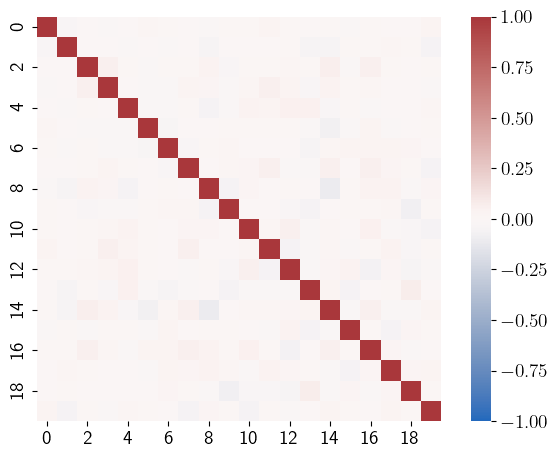

In [3]:
dataset.heatmap()

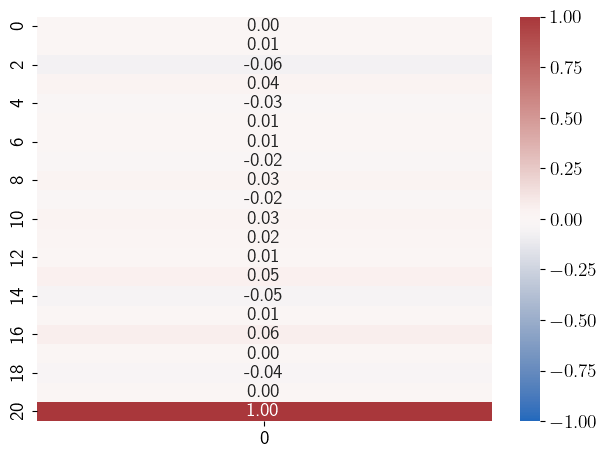

In [4]:
dataset.target_corr()

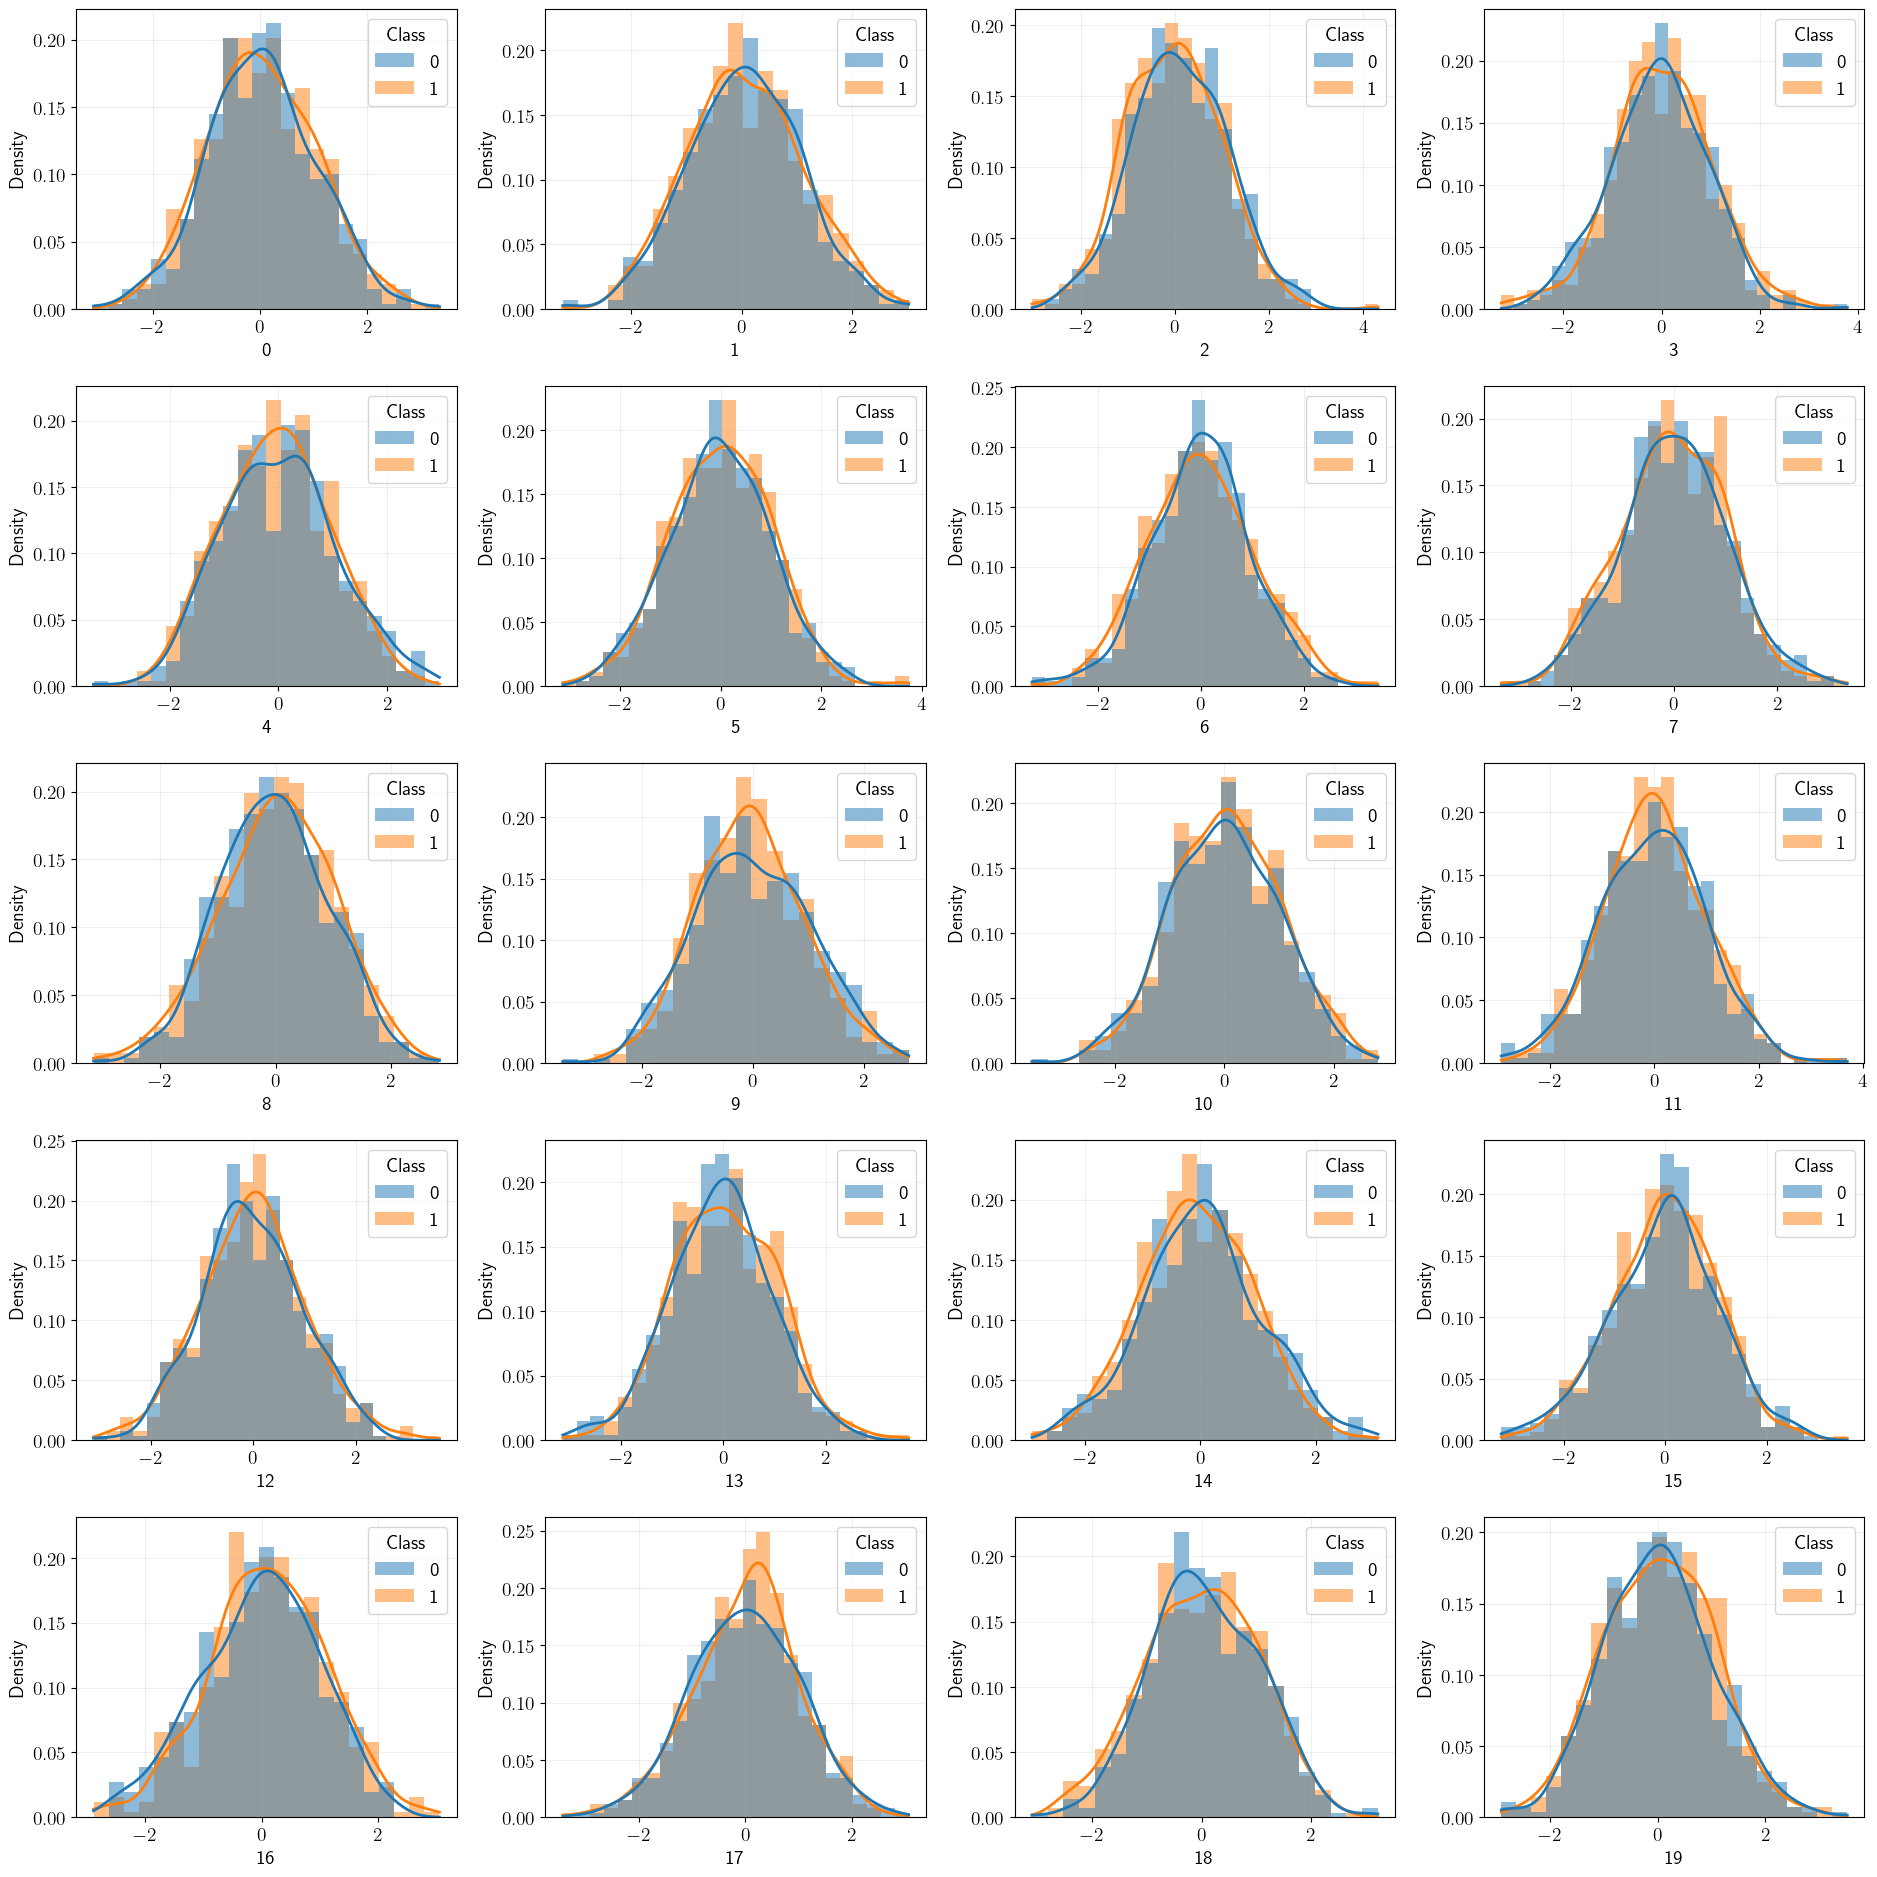

In [5]:
make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [120]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

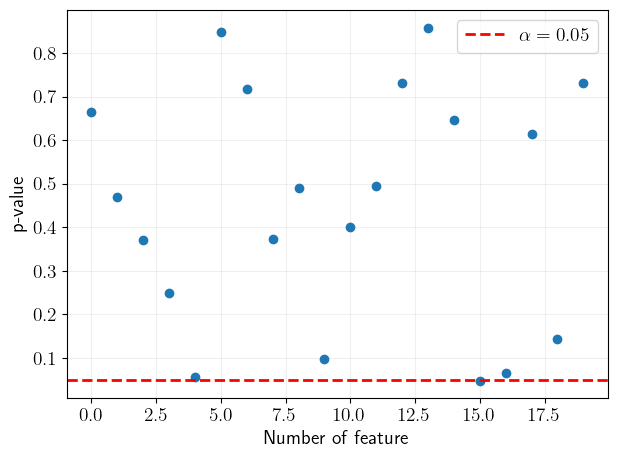

In [7]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

<Axes: >

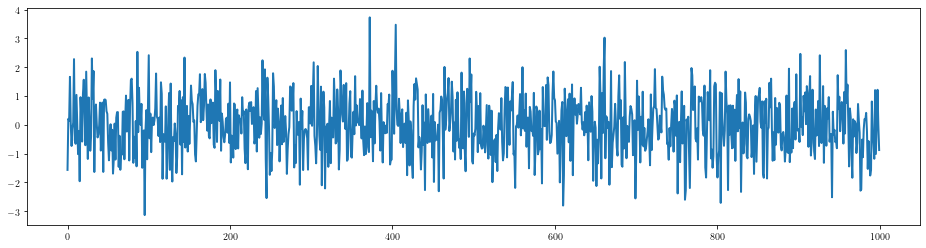

In [5]:
plt.figure(figsize=(16, 4))
dataset.X1[5].plot()

In [121]:
X1_stage1 = dataset.X1[dataset.X1 > dataset.X1.quantile(q=0.05)][dataset.X1 < dataset.X1.quantile(q=0.95)]

In [122]:
X2_stage1 = dataset.X2[dataset.X2 > dataset.X1.quantile(q=0.05)][dataset.X2 < dataset.X1.quantile(q=0.95)]

In [123]:
X1_stage2 = X1_stage1.fillna(X1_stage1.mean())
X2_stage2 = X2_stage1.fillna(X1_stage1.mean())

In [124]:
dataset.X1 = X1_stage2 
dataset.X2 = X2_stage2

dataset.get_scaled_data()
dataset.get_divergences()

In [125]:
dataset.divergences[dataset.divergences>0.002].shape[0]

10

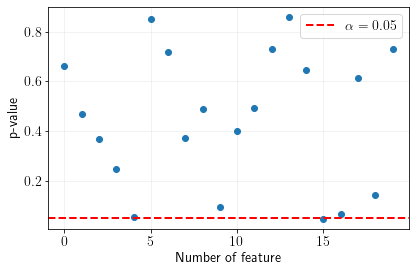

In [127]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

---

---

### Logistic Regression

100%|██████████| 20/20 [00:04<00:00,  4.59it/s]


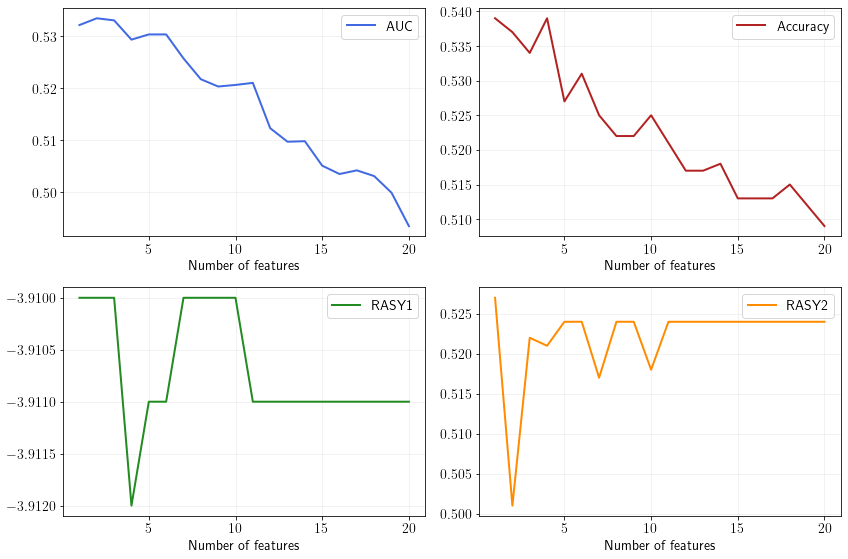

In [128]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression())

100%|██████████| 11/11 [00:07<00:00,  1.39it/s]


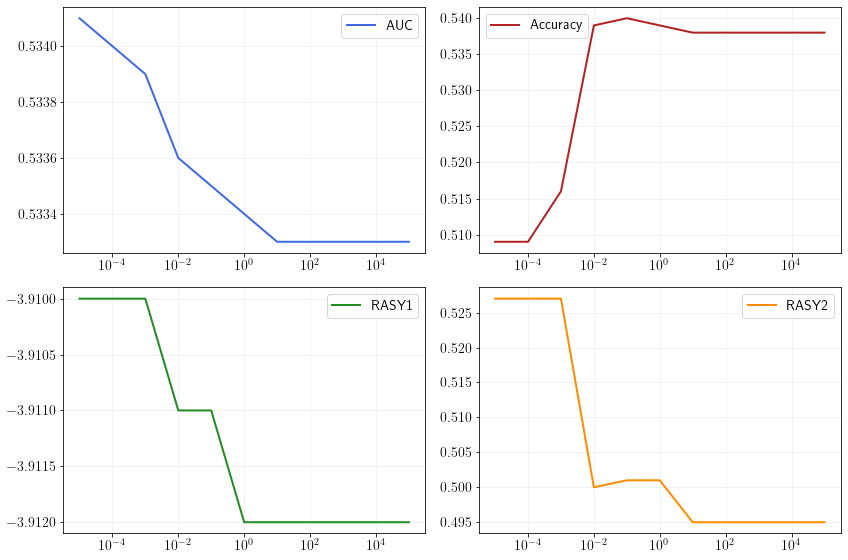

In [129]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-5, 5, 11))

### Naive Bayes

100%|██████████| 20/20 [00:03<00:00,  5.80it/s]


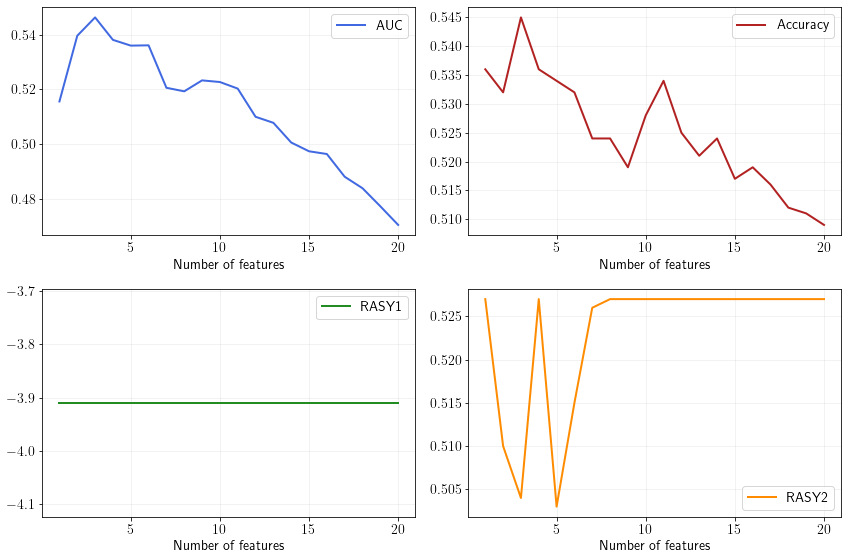

In [130]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB())

In [34]:
gnb = GaussianNB()
gnb.fit(dataset.X1_scaled, dataset.y1)
y_score = gnb.predict_proba(dataset.X1_scaled)[:, 1]

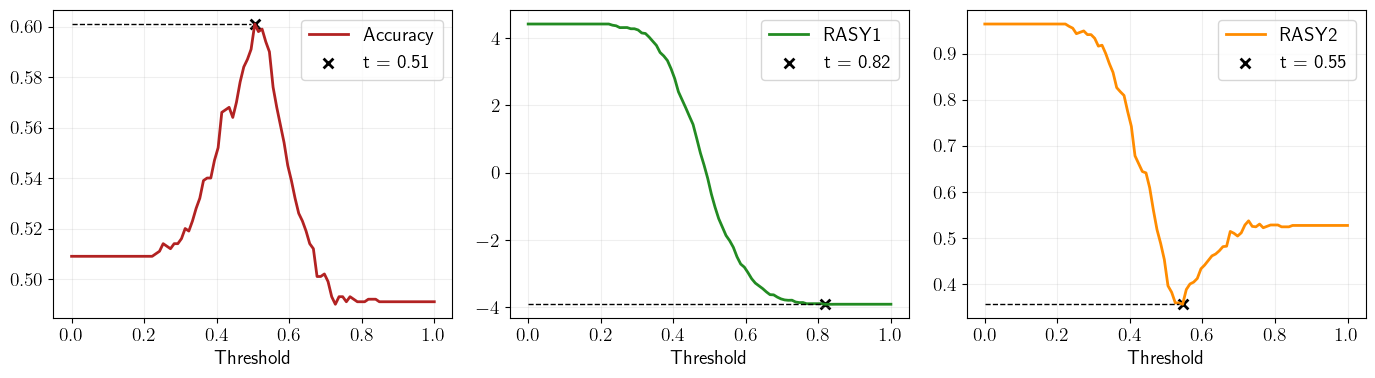

In [39]:
_ = opt_thresholds(dataset.y1, y_score, save=True)

100%|██████████| 20/20 [00:49<00:00,  2.47s/it]


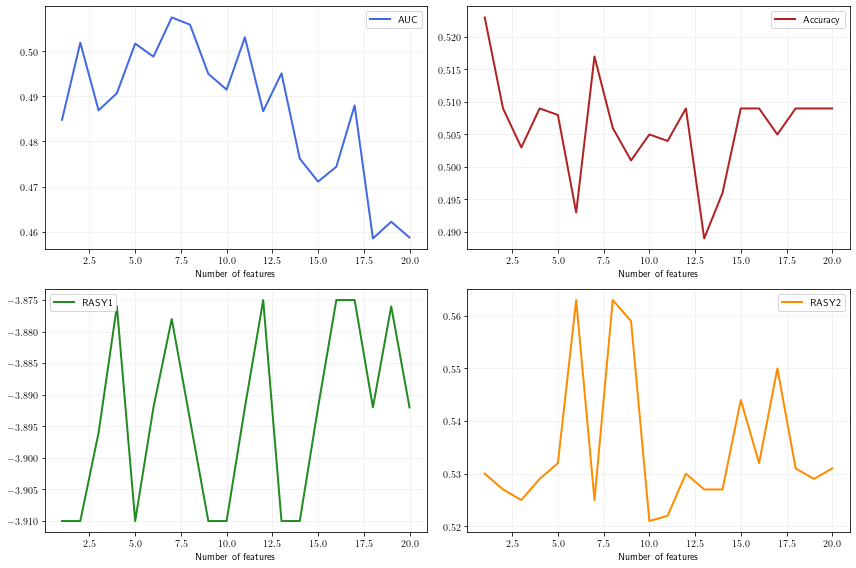

In [12]:
from sklearn.ensemble import RandomForestClassifier

features_cols_rfc = dataset.metrics_n_features_dependence(RandomForestClassifier(n_jobs = -1))

### Saving aswers 

In [68]:
model_AUC = GaussianNB()
model_Accuracy = GaussianNB()
model_RASY1 = GaussianNB()
model_RASY2 = GaussianNB()
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [69]:
features_AUC, cols_AUC = features_cols_gnb['AUC']['features'], features_cols_gnb['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_gnb['Accuracy']['features'], features_cols_gnb['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_gnb['RASY1']['features'], features_cols_gnb['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_gnb['RASY2']['features'], features_cols_gnb['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [70]:
t_Accuracy = features_cols_gnb['Accuracy']['t']
t_RASY1 = features_cols_gnb['RASY1']['t']
t_RASY2 = features_cols_gnb['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [71]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [72]:
cols_list

[array([ 8,  2, 17], dtype=int64),
 array([ 8,  2, 17], dtype=int64),
 array([8], dtype=int64),
 array([ 8,  2, 17, 16,  9], dtype=int64)]

In [73]:
print(f'{thresholds_list[2]:.2f}')

0.56
